# Kalman Filter

## Noisy Pendulum Model
This material is from the book: S. Sarrka, Bayesian Filtering and Smoothing, Cambridge University Press, 2013.

 The differential equation for a simple pendulum with unit length and mass can be written as 

$\frac{\partial^2 \alpha }{\partial x^2} = -g sin(\alpha ) + w(t)$

where $\alpha $ is the angle, g is the gravitational acceleration and $w(t)$ is a random noise process. This model can be converted 
into the following state space model:
   
$ \frac{\mathrm{d} }{\mathrm{d} t} \binom{x_{1}}{x_{2}} = \binom{x_{1}}{-gsin(x_{1})} + \binom{0}{1} w(t) $
    
where $x_{1} = \alpha $ and $x_{2} = \frac{\mathrm{d} \alpha }{\mathrm{d} x} $ . this can be seen to be special case of continuous-time and non-linear dynamic models of the form $ \frac{\mathrm{d} x }{\mathrm{d} t} $= $f(x) + Lw $
    
where f(x) is a non-linear function. We can then for example consider measuring the angular position of the pendulum, which leads to the linear 
Gaussian measurement model

  $ y_{k} = \alpha(t_{k}) + $  noise
    
But if we measure the horizontal position of the pendulum, we would get a non-linear measurement model

  $ y_{k} = sin(\alpha(t_{k})) + $  noise
    
By a suitable numerical integration scheme we can convert the non-linear dynamic model into discrete time, non-linear dynamic model, which then 
results in a model of the generic non-linear state space form 

  $ x_{k} = f(x_{k-1}, q_{k-1})$
    
  $ y_{k} = h(x_{k}, r_{k})$

where $y_{k}$ is the vector of measurements $q_{k-1} \sim N(0,Q)$ and $r_{k} \sim N(0,R)$. Estimation of the pendulum state can now be implemented using 
extended kalman filter , unscented Kalman filter (UKF) or particular filter. 
    



Illustration of pendulum example. 
In addition to the gravitation g there is an additional unknown force component w(t). which is modeled as white noise. 

## Problem: 
A simple discretization of the pendulum model above leads to the following model: 
        
$$\begin{bmatrix}
x_{1,k}
\\ 
x_{2,k}
\end{bmatrix}  
= 
\begin{bmatrix}
x_{1,k-1}+x_{2,k-1}\Delta t
\\ 
x_{2,k-1}-gsin(x_{1,k-1})\Delta t
\end{bmatrix}
+ q_{k-1}$$
    
where $x_{(k)}= 
\begin{bmatrix}
x_{1,k}
\\ 
x_{2,k}
\end{bmatrix}$

and $f(x_{k-1}) = 
\begin{bmatrix}
x_{1,k-1}+x_{2,k-1}\Delta t
\\ 
x_{2,k-1}-gsin(x_{1,k-1})\Delta t
\end{bmatrix} $

Also,

$y_{k} = sin(x_{1,k})+r_{k}$
    
where $q_{k-1} \sim N(0,Q)$ and $r_{k} \sim N(O,R)$ with 
    
  $Q = \begin{bmatrix}
q^{c} \Delta t^{3}/3 & q^{c} \Delta t^{2}/2\\  
q^{c} \Delta t^{2}/2 & q^{c} \Delta t\\ 
\end{bmatrix} $
    
where $q^{c}$ is the spectral density of the continous-time process noise. Assume that $  \Delta t=0.01 $, g  = 9.81, $q^{c}=0.01$, R  = 0.1.

Estimate the position of pendulum over time using particle filter. Compare your estimate with the true values. Observed values $y$ are store in the file Pendulum.txt  - this is your input that you need to read sequentially. 

(You can use FilterPy implementation https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python.)

Q1: The key of the kalman filter is to find the Covarience matrix, Status matrix, and Control matrix. The kalman filter keeps making predictions based on the prior and update the covarience matrix of the status covariance matrix. The error caused by the Gaussian noise.<br>

In order to implement, the first ting is to initialize the data, and iterate within predictions and updating.


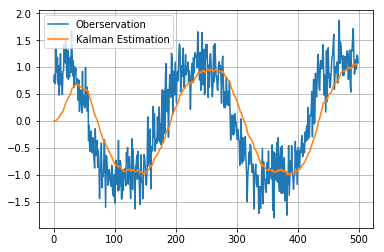

In [47]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import math

A=np.matrix([[1, 0.01],[1, -9.81*0.01]]) #state transform

result=[]

with open('Pendulum.txt','r') as f:
    
    for line in f:
        
        result.append(list(map(float,line.split(','))))

x_1=0

x_2=0

# Covariance noise matrix
# Q = np.matrix([[(0.01**4)/3, (0.01**3)/2],
#               [(0.01**3)/2, (0.01**2)]])
Q = (0.01**1.8)/1 
R = 0.1

def Kalman_Filter(data, Q, R, x0, p0):
    
    N=len(data)
    
    K=np.zeros((N,1))
    X=np.zeros((N,1))
    P=np.zeros((N,1))
    
    X[1]=x0  # Stautes
    P[1]=p0 # covariance 
    
    # Keep make predictions and update the status 
    for i in range(1,N):
        K[i] = P[i-1] / (P[i-1]+R)
        Diff = (data[i] - X[i-1])
        X[i] = X[i-1] + K[i] * Diff
        P[i] = P[i-1] - K[i] * P[i-1] + Q
        
    return X

kkt=Kalman_Filter(result, Q, R, 0, 1)
plt.figure()
plt.plot(result, label='Oberservation')
plt.plot(kkt,label='Kalman Estimation')
plt.legend()
plt.grid()
plt.show()


The estimation is approximatly the observation, but we can see there existing a slightly shift between the original data and the estimations. One of the reasons can be explained as the perporties of the system. 

## Problem: 
This problem is related to voltage measurement of the battery of the car. Every time the voltage is measured it has different value due to noise. Filtering of the noise will be done using Kalman filter. The model is as follows: <br>
$x_{k+1}=x_k$ <br>
$z_k=x_k+v_k$ <br>
$x_0=14$, <br>
$v_k \sim N(0,2)$
1.	Generate noisy data for N=50 measurements
2.	Perform Kalman or particle filtering
3.	Analyze the error covariance as the time passes
(You can use FilterPy implementation https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python.)


Q1: Generate the guassian noise date:

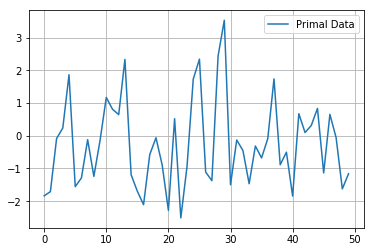

In [54]:
mu = 0
sigma = 2**0.5
N = 50

v = np.random.normal(mu, sigma, N)

plt.figure()
plt.plot(v, label='Primal Data')
plt.legend()
plt.grid()
plt.show()

Q2: Apply the Kalman filtering:

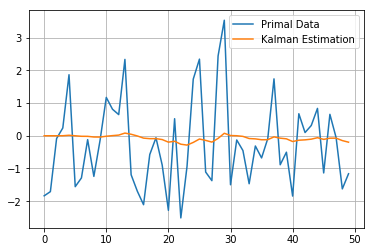

In [58]:
x0 = 14
    
N = len(v)
    
K=np.zeros((N,1))
X=np.zeros((N,1))
P=np.zeros((N,1))

Diff=np.zeros((N,1))

X[1] = 14  # Stautes
P[1] = 1 # covariance 
    
# Keep make predictions and update the status 
for i in range(1,N):
    K[i] = P[i-1] / (P[i-1]+R)
    Diff[i] = (v[i] - X[i-1])
    X[i] = X[i-1] + K[i] * Diff[i]
    P[i] = P[i-1] - K[i] * P[i-1] + Q        

plt.figure()
plt.plot(v, label='Primal Data')
plt.plot(X,label='Kalman Estimation')
plt.legend()
plt.grid()
plt.show()

The estimator wandered around the mean value of the data, can be considered a noise cancelling filter at the case.

Q3: Tracking the error covariance:

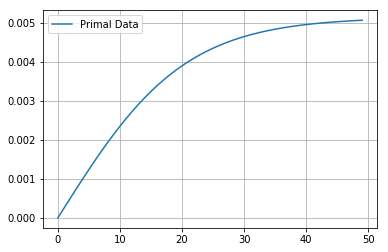

In [61]:
plt.figure()
plt.plot(P, label='Error Covariance')
plt.legend()
plt.grid()
plt.show()

As the plot indicates, the error covariance is increasing, but it finally tends to converge at a certain level. In general, the error covariance is not large in this case.